# Waiting for Wheels: Can Cyclists Plan with Punxsutawney Phil?  
![](phil.png){width=400} 

Each February, in Punxsutawney Pennsylvania, Phil the groundhog decides the fate of warm-weather loving athletes across America. If Phil emerges from his hole and sees his shadow, legend says that there will be six more weeks of winter. 

For Phil's fans in Philadelphia's cycling community, the real question isn't whether the groundhog sees his shadow — it's how long until the bike can come out of storage.

I analyzed 20 years of Philadelphia weather data to answer the question every winter-weary cyclist asks: when can I finally ride without freezing?

The answer? It depends on the year — and Phil's timeframe isn't a reliable range to hope for spring.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
weather_df = pd.read_csv('data/philadelphia_weather_2005_to_2025.csv')
weather_df = weather_df.assign(date=pd.to_datetime(weather_df['date']))

In [26]:
#make a graph that has year on the x axis, and number of days before the weather improves
#make a new column with a value for whether the weather is > 65 degrees
#want to change this so that days = number of days after gh day until high temp = 65

ghday = pd.to_datetime( #makes a datetime object
    dict( #for every row the dataset, it'll give the second of feb 
        year=weather_df["date"].dt.year,
        month=2,
        day=2))

#all days after Groundhog Day where high > 70
#example approach
#winter_filter = (weather_df['date']>=ghday) & (weather_df['date']<=winter_end) #looks at dates between gh and 6 weeks after
warm_days = weather_df[(weather_df['date'] >= ghday) & (weather_df['high'] > 70)]
    #filters by days after groundhog day, AND where tempertature is greater than 70 degrees

#first warm day for each year
first_warm_day = warm_days.groupby('year')['date'].min()

#make a dataset that includes the year and the number of days since ghday it took to get to the warmest day
ghday_by_yr = pd.to_datetime(dict(year=first_warm_day.index, month=2, day=2)) #I had to look up how to change the code you gave us w the index
ghday_by_yr.index = first_warm_day.index  # match the index (also had to look this up)

#finding the number of days it took for the weather to get better
days = (first_warm_day - ghday_by_yr).dt.days

days.mean()


np.float64(43.23809523809524)

In [24]:
days[days == days.min()]

year
2018    18
dtype: int64

In [25]:
days[days == days.max()]

year
2014    68
dtype: int64

On average, Philadelphians wait about 43 days after Groundhog Day for the first 75°F high (the perfect cycling weather). But the range is brutal. In 2018, lucky cyclists hit the roads within 18 days. But just four years later, there was a punishing 68 days of waiting, well past when Phil promised spring would arrive.

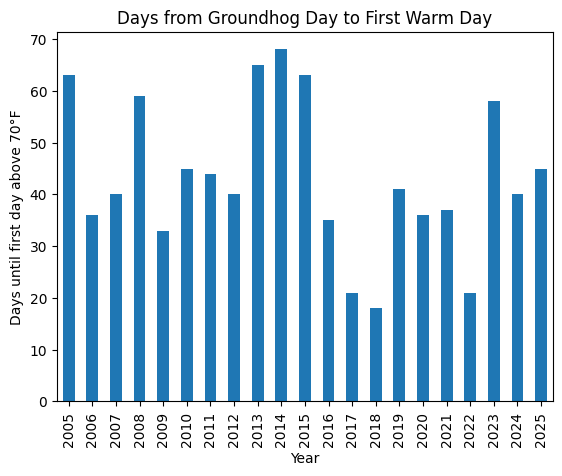

In [27]:
days.plot(kind='bar')
#days.plot(kind='line', style='-o')
plt.ylabel('Days until first day above 70°F')
plt.xlabel('Year')
plt.title('Days from Groundhog Day to First Warm Day')
plt.show()

Furthermore, there doesn't seem to be a predictable pattern in the number of days until cyclists can reliably set out for the trail. Although 2015 through 2019 may have given false hope for an early spring, there are a clustering of years after 2010 where wait times for good riding weather were well over 40-50 days. 


## Can Phil Schedule your Tune-Up? 

Each year, Phil's predictions fall within a six-week range, meaning that even if past weather patterns give few clues to hopeful sunbathers and sportspeople, maybe a magic groundhog can. 

The following graph demonstrates in orange, the number of days where it took less than six weeks for the weather to improve. In 12 out of 20 years, it took over 42 days for the weather to improve. In most other cases, it took much longer. 

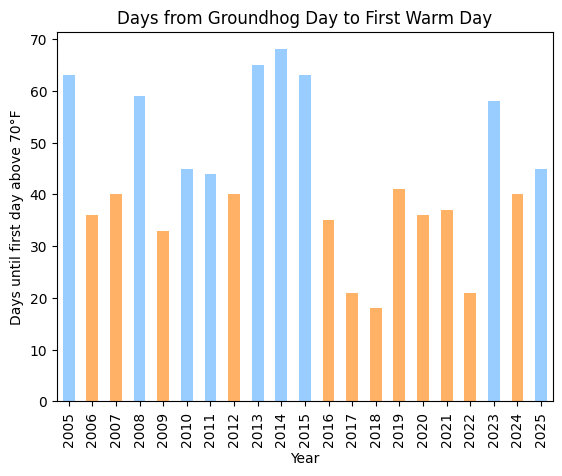

In [28]:
#if days are greater than 6*7 (42), then turn the bar of the graph red
fill_colors = ['#99CCFF' if d >= 42 else '#FFB266' for d in days]
#plot
ax = days.plot(kind='bar')
fill_colors = ['#99CCFF' if d >= 42 else '#FFB266' for d in days] #days until good cycling weather is > six weeks in orange
for patch, color in zip(ax.patches, fill_colors):
    patch.set_facecolor(color)
plt.ylabel('Days until first day above 70°F')
plt.xlabel('Year')
plt.title('Days from Groundhog Day to First Warm Day')
plt.show()


The key takeaway is that although on average, it will take six weeks for winter to end, from year to year, outdoor athletes shouldn't plan their rides or runs around a groundhog's time frame. 
This variaiton suggess that bike commuters should ignore the groundhog and just buy good gloves.